# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [203]:
import sympy as sym
sym.interactive.printing.init_printing(use_latex=True)

In [16]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m   

In [122]:
def plotModelo(x,y,r,xlabel,ylabel,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = r.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(20,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = r.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [320]:
def plotModeloModificado(x,y,r,xlabel,ylabel,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = r.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(20,6))
    
    ax[0].contour(B_0,B_1, Z, levels = np.arange(0, 10, 0.01), label = "datos")
    ax[0].plot(_beta[0], _beta[1], "ro")
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = r.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

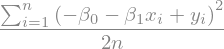

In [298]:
x = sym.Symbol('x')
y = sym.Symbol('y')
yb = sym.Symbol('ybold')
b0 = sym.Symbol('beta_0')
b1 = sym.Symbol('beta_1')
n = sym.Symbol('n')
i = sym.Symbol('i')
J = sym.Function('J')(b0, b1)         # creamos todos los symbolos para la ecuación
J = sym.Sum((sym.Indexed(y, i) - b0 - b1*sym.Indexed(x, i))**2, (i, 1, n))/(2*n)   # creamos la ecuación en si con suma
J

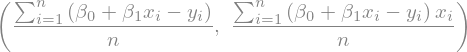

In [299]:
derivJb0 = sym.simplify(sym.diff(J, b0))
derivJb1 = sym.simplify(sym.diff(J, b1))   # derivamos la función respecto a los dos betas
derivJb0, derivJb1                         # Q.E.D.

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

In [309]:
X = np.loadtxt('data/edad-Copy1.dat')
Y = np.loadtxt('data/altura-Copy1.dat')   # cargamos los datos a dos variables

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [310]:
# creamos función para J(bo,b1)
def J(beta_0, beta_1):
    costo = 0
    for i in range(0, len(Y)):
        costo += ((Y[i] - beta_0 - beta_1*X[i])**2)/(2*len(Y))
    return costo

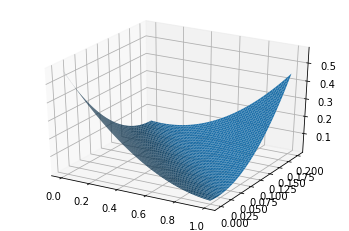

In [311]:
beta_0 = np.arange(0, 1, 0.001)
beta_1 = np.arange(0, 0.2, 0.0002)

B_0, B_1 = np.meshgrid(beta_0, beta_1)      # creamos un meshgrid para todas las diferentes combinaciones de 
                                            # los valores de b_0 y b_1
Z = J(B_0, B_1)                             # pasamos cada valor en el meshgrid por J

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # graficamos todos los datos que creamos en esta sección

ax.plot_surface(B_0, B_1, Z)

Text(0, 0.5, 'beta 1')

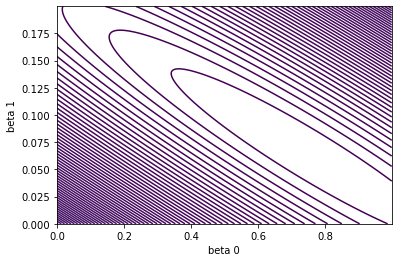

In [315]:
fig = plt.figure()
plt.contour(B_0, B_1, Z, levels = np.arange(0, 10, 0.01))   # graficamos la gráfica de contorno
plt.xlabel("beta 0")
plt.ylabel("beta 1")

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

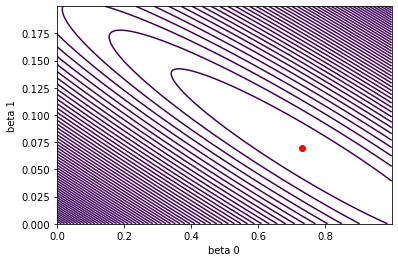

In [318]:
fig = plt.figure()
plt.contour(B_0, B_1, Z, levels = np.arange(0, 10, 0.01))   # graficamos la gráfica de contorno
plt.xlabel("beta 0")
plt.ylabel("beta 1")
plt.plot(0.73, 0.07, "ro")                                  # colocamos punto en última iteración

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

In [321]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)    # creamos objeto RegresionLineal
r.gradientDescent(X, Y)                                             # aplicamos gradientDescent

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModeloModificado, x=fixed(X), y=fixed(Y), r=fixed(r), xlabel=fixed(""), ylabel=fixed(""), iteracion=(0,ultima_iteracion,10));

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


interactive(children=(IntSlider(value=590, description='iteracion', max=1189, step=10), Output()), _dom_classe…

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [326]:
# creamos función que hace lo mismo que en la pregunta c) pero se puede variar el alpha
def pregunta2d(alpha):
    r = RegresionLineal(alpha, max_iters=10000, tols=0.0000001)
    r.gradientDescent(X, Y)

    ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

    plotModeloModificado(x, y, rd, "", "", ultima_iteracion)

In [329]:
interact(pregunta2d, alpha=(0,0.1,0.001))    # creamos widget a partir de la función previa

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, step=0.001), Output()), _dom_class…

<function __main__.pregunta2d(alpha)>

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [123]:
chirpsPerSec_arr = []
temp_arr = []
chirps = open('data/chirps-Copy1.txt', "r")
chirps.readline()
for line in chirps:
    reader = line.split("\t")
    chirpsPerSec_arr.append(float(reader[0]))
    temp_arr.append(float(reader[1]))
                                                # extraemos los datos del archivo
CPS = np.array(chirpsPerSec_arr)                # convertimos listas en arrays de numpy
T = np.array(temp_arr)

Text(0, 0.5, 'Temperature (º F)')

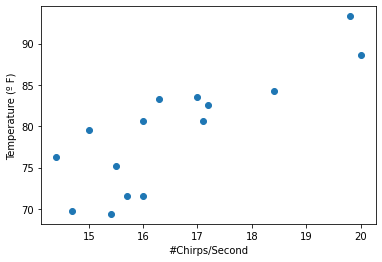

In [124]:
# graficamos los datos
plt.scatter(CPS,T, label="data")
plt.xlabel('#Chirps/Second')
plt.ylabel('Temperature (º F)')

In [276]:
# hacemos la regresion lineal utilizando gradient descent
r = RegresionLineal(alpha=0.003, max_iters = 1000000, tols=0)
r.gradientDescent(CPS,T)

La función convergió con beta: [22.84870914  3.41033933] en la iteración 383397


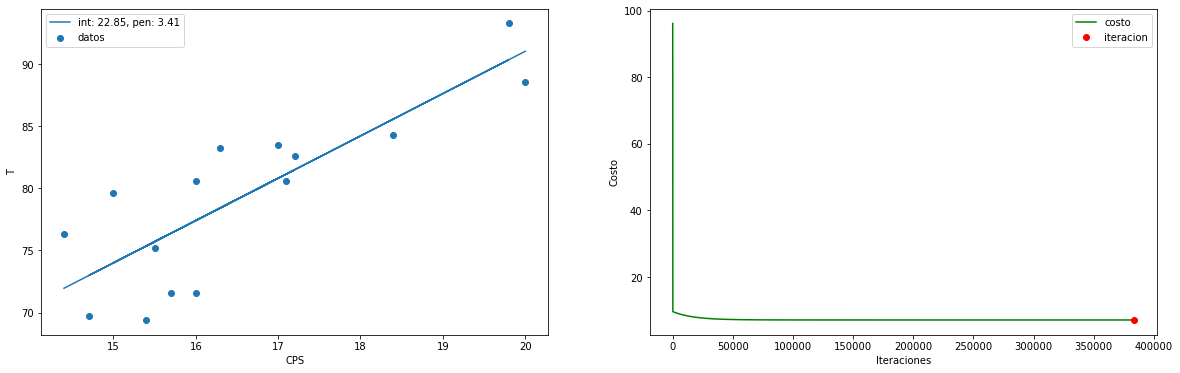

In [277]:
plotModelo(CPS,T, r, "CPS", "T", 383396)   # graficamos

**Respuesta:** Los valores de la regresion linear son casi exactamente iguales a los de la página web. Logre encontrar el mejor modelo (y su alpha) con prueba y error buscando un modelo que convergía con tolerancia de 0.

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [7]:
anscombe_arr = np.loadtxt('anscombe.txt')      # cargamos el archivo

anscombe_arr_fin=[[],[],[],[],[],[],[],[]]     # reacomodamos el archivo correctamente
for i in anscombe_arr:
    k = 0
    for j in i:
        anscombe_arr_fin[k].append(j)
        k+=1
anscombe_arr_fin = np.array(anscombe_arr_fin)

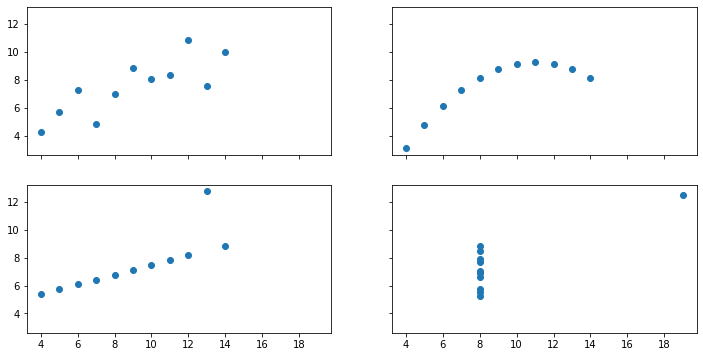

In [8]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey = True)  # graficamos los cuatro conjuntos de datos
fig.set_size_inches(12,6)
ax[0,0].scatter(anscombe_arr_fin[0],anscombe_arr_fin[1])
ax[0,1].scatter(anscombe_arr_fin[2],anscombe_arr_fin[3])
ax[1,0].scatter(anscombe_arr_fin[4],anscombe_arr_fin[5])
ax[1,1].scatter(anscombe_arr_fin[6],anscombe_arr_fin[7])

In [249]:
# Creamos 4 objetos RegressionLineal
reg4_1 = RegresionLineal(alpha = 0.003, max_iters = 100000, tols = 0)   
reg4_2 = RegresionLineal(alpha = 0.003, max_iters = 100000, tols = 0) 
reg4_3 = RegresionLineal(alpha = 0.003, max_iters = 100000, tols = 0) 
reg4_4 = RegresionLineal(alpha = 0.003, max_iters = 100000, tols = 0) 

In [250]:
reg4_1.gradientDescent(anscombe_arr_fin[0],anscombe_arr_fin[1])   # aplicamos funcion gradientDescent

La función convergió con beta: [3.00008683 0.50009131] en la iteración 41286


In [251]:
reg4_2.gradientDescent(anscombe_arr_fin[2],anscombe_arr_fin[3])   # aplicamos funcion gradientDescent

La función convergió con beta: [3.0009047  0.50000043] en la iteración 41065


In [252]:
reg4_3.gradientDescent(anscombe_arr_fin[4],anscombe_arr_fin[5])   # aplicamos funcion gradientDescent

La función convergió con beta: [3.00244952 0.49972777] en la iteración 40652


In [253]:
reg4_4.gradientDescent(anscombe_arr_fin[6],anscombe_arr_fin[7])   # aplicamos funcion gradientDescent

La función convergió con beta: [3.00172424 0.49990939] en la iteración 42197


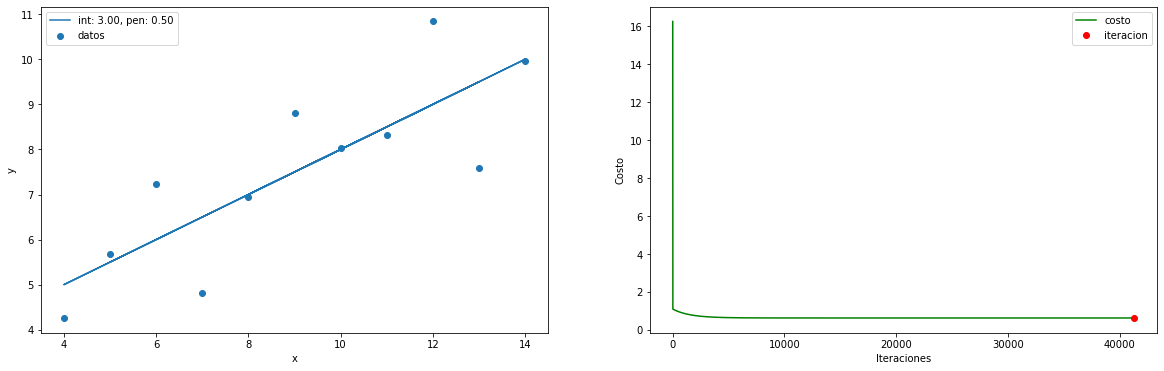

In [248]:
plotModelo(anscombe_arr_fin[0],anscombe_arr_fin[1], reg4_1, "x", "y", 41285)   # graficamos

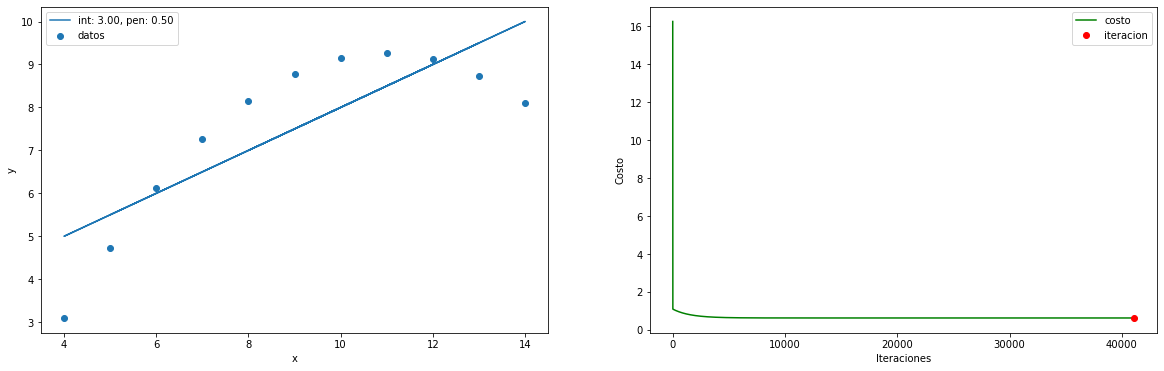

In [255]:
plotModelo(anscombe_arr_fin[2],anscombe_arr_fin[3], reg4_2, "x", "y", 41064)   # graficamos

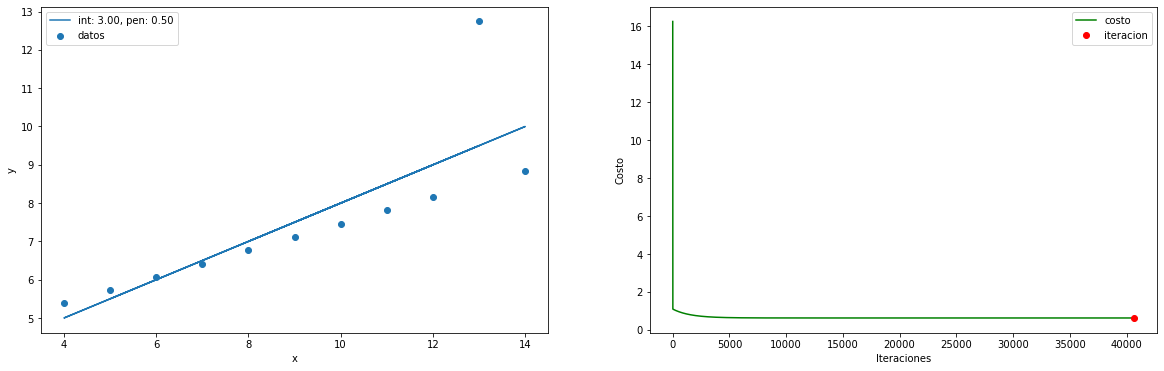

In [254]:
plotModelo(anscombe_arr_fin[4],anscombe_arr_fin[5], reg4_3, "x", "y", 40651)   # graficamos

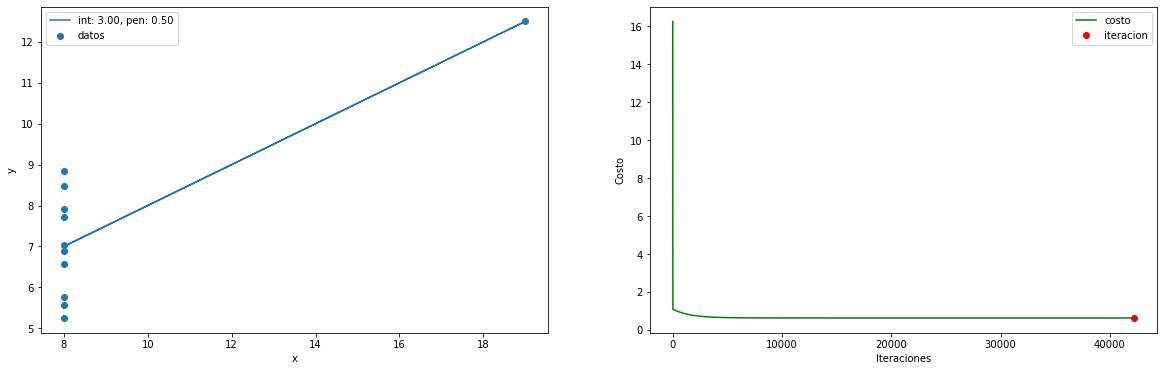

In [256]:
plotModelo(anscombe_arr_fin[6],anscombe_arr_fin[7], reg4_4, "x", "y", 42196)   # graficamos

**Respuesta:** Al calular la regresión lineal, tenemos la misma recta para cada uno de los conjuntos de datos, que son muy distintos entre si.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [11]:
time_arr = []
N_arr = []
radioactive_decay = open('data/radioactive_decay-Copy1.txt', "r")
radioactive_decay.readline()
for line in radioactive_decay:
    reader = line.split("\t")
    time_arr.append(float(reader[0]))
    N_arr.append(float(reader[1]))
    
time = np.array(time_arr)
Ns = np.array(N_arr)                    # extraemos y organizamos los datos dados

**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'N (remaining)')

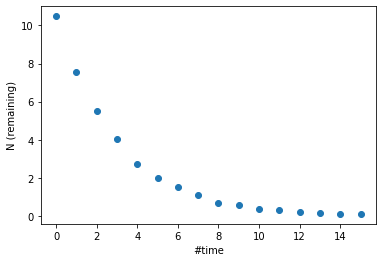

In [12]:
plt.scatter(time,Ns, label="data")      # graficamos los datos
plt.xlabel('#time')
plt.ylabel('N (remaining)')

**Respuesta:** Los datos tienen forma exponencial.

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**Respuesta:** Para linearizar estos datos debemos pasar los valores de y por la funcion logaritmo. De esta manera, si $\ y = Ae^{kx}$ entonces la transformacion resultara en $\ log(y)=kx+logA$.

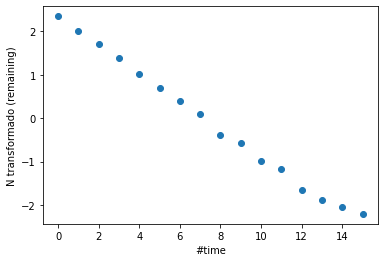

In [13]:
N_transf = []                      # creamos arreglo
for i in N_arr:
    N_transf.append(np.log(i))     # añadimos cada elemento de el arreglo previo pasandolo por log(x)
    
N_transf
plt.scatter(time,N_transf, label="data")      # graficamos los datos nuevos
plt.xlabel('#time')
plt.ylabel('N transformado (remaining)')
np.savetxt("transform_radioactive_decay.txt", N_transf, fmt="%s")       # salvamos los datos nuevos

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [267]:
reg5 = RegresionLineal(alpha=0.003, max_iters = 100000, tols=0)     # creamos objeto RegresionLineal
x_5 = np.array(time_arr)
y_5 = np.loadtxt('transform_radioactive_decay.txt')
reg5.gradientDescent(x_5,y_5)                                       # aplicamos gradientDescent

La función convergió con beta: [ 2.29661472 -0.31664834] en la iteración 19651


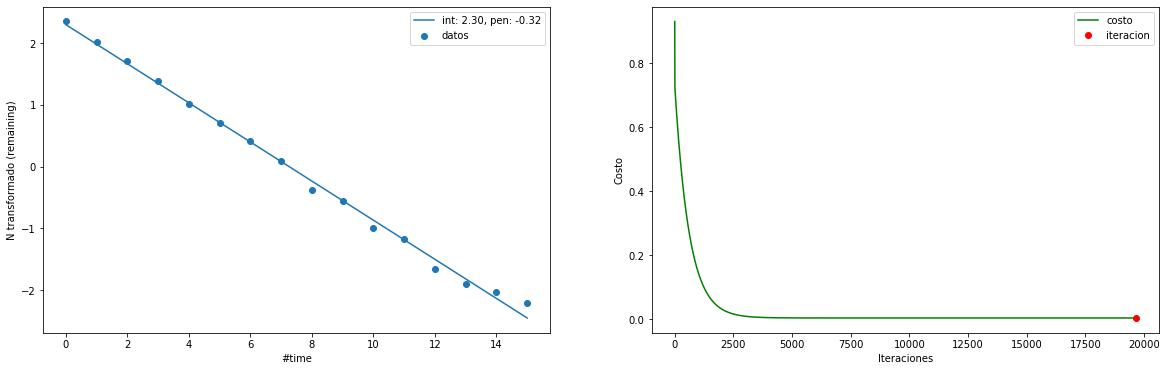

In [268]:
plotModelo(x_5, y_5, reg5, "#time", "N transformado (remaining)", 19650)   # graficamos datos en última iteración

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

$$ \beta_0 = 2.30, \beta_1 = -0.32 $$

Debido a que 
$\ y = Ae^{kx}$ y $\ log(y)=kx+logA$

$\ logA = \beta_0$  y  $\ k = \beta_1$

$\ A = e^{\beta_0} = e^{2.30} = 9.97418$  y  $\ k = -0.32$

$\therefore A = 9.97418$  y  $\ k = -0.32$,  para $\ y = Ae^{kx}$